<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Tapete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tapete de Sierpinski**


 *José Claudinei Ferrreira*
 
 *Universidade Federal de Alfenas (UNIFAL-MG)*

Este texto traz uma possibilidade de construção do [Tapete de Sierpinski](https://pt.wikipedia.org/wiki/Tapete_de_Sierpinski).

A construção aqui apresentada usa argumentos de [Geometria Analitica](https://pt.wikipedia.org/wiki/Geometria_anal%C3%ADtica) e [Álgebra Linear](https://pt.wikipedia.org/wiki/%C3%81lgebra_linear).

Considere o segmento ligando os pontos $u_0=(1,2)$ e $u_1=(2,3)$, por exemplo. 

Vamos pensar nesse segmento como se fosse a imagem de uma função $u_0(t)$, sendo $u_0:[0,1]\to \mathbb{R}^2$. 

<font color=blue> Podemos ver esse segmento como o trajeto ligando os pontos $u_0$ e $u_1$, por meio de poligonais. 

<font color=green> Você pode imaginar isso em dimensão maior?!

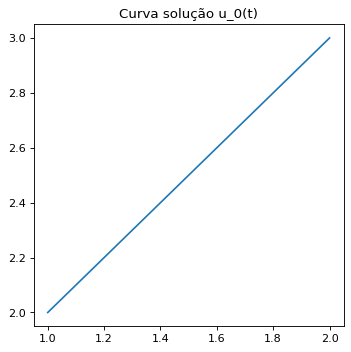

In [46]:
from matplotlib import pyplot as plt

x1 = [1,2]
y1 = [2,3]

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(x1, y1, '-')
plt.title("Curva solução u_0(t)")
plt.show()

Agora considere o vetor $v=u_1-u_0=(1,1)$.

In [47]:
import numpy as np # Para lidar com vetores e matrizes.

u0=np.array([1,2])
u1=np.array([2,3])
v=u1-u0
v

array([1, 1])

Podemos usar esse vetor para determinar dois outros pontos no segmento, de tal forma a dividí-lo em três partes de mesmo comprimento.

Para isso vamos usar o vetor $v/3=(1/3,1/3)$. 

Teremos os pontos $u_2=u_0+v/3$ e $u_3=u_0+2v/3$.

u2=[1.33333333 2.33333333]

u3=[1.66666667 2.66666667]


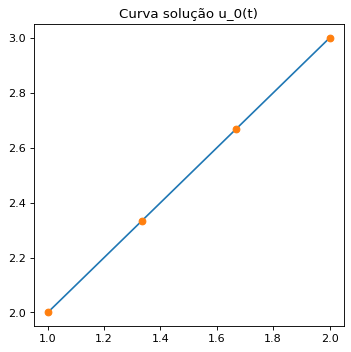

In [48]:
u2=u0+v/3
u3=u0+2*v/3
print(f'u2={u2}')
print()
print(f'u3={u3}')
pontos=np.transpose(np.array([u0,u2,u3,u1]))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], '-')
plt.plot(pontos[0], pontos[1], 'o')
plt.title("Curva solução u_0(t)")
plt.show()

<font color=blue> Podemos ver esses três segmentos como o trajeto ligando os pontos $u_0$ e $u_1$, por meio de poligonais, passando pelos outros dois pontos $u_2$ e $u_3$, na ordem $u_0,\,u_2,\,u_3,\, u_1$.

Agora vamos retirar a parte do meio do segmento (ou o segmento menor do meio) e substituí-lo por segmentos que formam um retângulo, no meio do trajeto entre $u_0$ e $u_1$ (veja as próximas duas figuras).

Uma forma de fazer essa construção é utilizar o vetor $v/3$, ou seja, somas e rotações desse vetor. Vamos usar também [matrizes de rotação](https://pt.wikipedia.org/wiki/Matriz_de_rota%C3%A7%C3%A3o) de ângulo $\theta$ nesse processo. 

Lembramos que, no nosso caso de interesse, esse tipo de matriz é da forma 
$$M=\begin{bmatrix}cos(\theta)&sen(\theta)\\-sen(\theta)&\cos(\theta)\end{bmatrix}.$$

In [74]:
def M(t): 
  m=np.array([[np.cos(t),np.sin(t)],[-np.sin(t), np.cos(t)]])
  return m

Fixando $\theta=\pi/2$, por exemplo, temos a matriz 
$$M=\begin{bmatrix}0&1\\-1&0\end{bmatrix},$$ que é a que usaremos até o final dessa seção.

In [75]:
Mt=M(np.pi/2)
Mt

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])

Vamos obter os outros pontos, sendo 
$$u_4=u_2+\frac{1}{3}Mv,\quad u_5=u_4+\frac{1}{3}v,\quad u_6=u_3-\frac{1}{3}Mv,\quad u_7=u_6-\frac{1}{3}v.$$

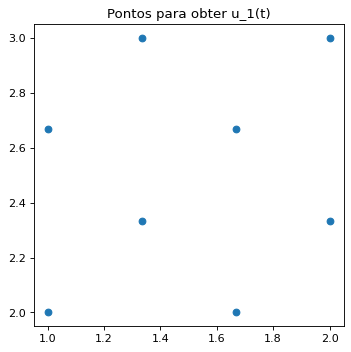

In [51]:
w=v/3
u4=u2+Mt@w   # @ denota o produto usual de matrizes.
u5=u4+w
u6=u3-Mt@w
u7=u6-w

pontos=np.transpose(np.array([u0,u2,u4,u5,u3,u6,u7,u1]))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.title("Pontos para obter u_1(t)")
plt.show()

Agora queremos uma poligonal ligando os pontos $u_0$ e $u_1$, e contendo esses pontos, na ordem $u_0,\,u_2,\,u_4,\, u_5,\,u_3,\, u_6,\, u_7,\,u_1$.

Para isso vamos precisar repetir alguns pontos, <font color=blue> para usar a função que produz os gráficos. A ordem fica $u_0,\,u_2,\,u_4,\, u_5,\,u_3,\, u_6,\, u_7,\,u_2,\,u_4,\, u_5,\,u_3,\,u_1$. 

<font color=green> A curva poligonal pode ser agora vista como uma curva $u_1(t)$.

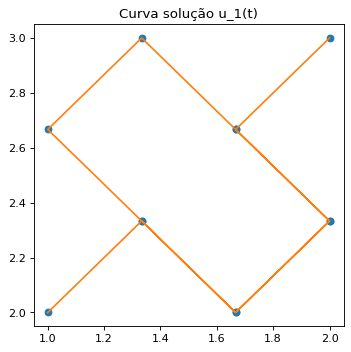

In [52]:
pontos=np.transpose(np.array([u0,u2,u4,u5,u3,u6,u7,u2,u4,u5,u3,u1]))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

#**Replicando o procedimento já descrito**

Esse processo de partir de um segmento de reta e construir uma curva poligonal, como a da figura anterior, pode ser repetido, usando agora cada segmento menor da poligonal.

Para fazer isso várias vezes e visualiar o processo, vamos definir uma função (em Phyton) que produz figura semelhante a anterior, com procedimento semelhente ao que usamos. 

Vamos chamar essa função de função de iteração.

In [53]:
def itera(a,b): # Iteração base, dados os pontos a e b do plano.
  u0=np.array(a)
  u1=np.array(b)
  w=(u1-u0)/3
  Mt=M(np.pi/2)
  u2=u0+w
  u3=u0+2*w
  u4=u2+Mt@w   # @ denota o produto usual de matrizes.
  u5=u4+w
  u6=u3-Mt@w
  u7=u6-w 
  p=np.array([u0,u2,u4,u5,u3,u6,u7,u2,u4,u5,u3,u1])
  return p

Testando o retorno da função definida:

In [54]:
itera(u0,u1)

array([[1.        , 2.        ],
       [1.33333333, 2.33333333],
       [1.66666667, 2.        ],
       [2.        , 2.33333333],
       [1.66666667, 2.66666667],
       [1.33333333, 3.        ],
       [1.        , 2.66666667],
       [1.33333333, 2.33333333],
       [1.66666667, 2.        ],
       [2.        , 2.33333333],
       [1.66666667, 2.66666667],
       [2.        , 3.        ]])

Para testar obtemos a figura o trajeto anterior:

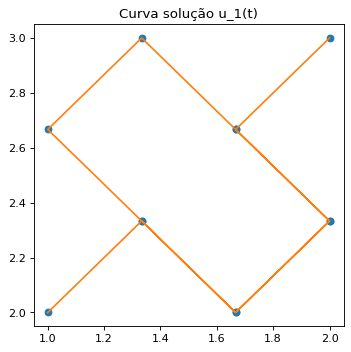

In [55]:
pontos=np.transpose(itera(u0,u1))
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

Agora vamos replicar o processo em cada novo segmento obtido. 

Para isso vamos definir uma nova função para ir trocando os segmentos:

In [56]:
def Sierpinski(a,b,m): # Replicação m vezes da iteração base, a e b são vetores com duas coordenadas.
   z=[]
   z.append(a)
   z.append(b)
   for i in range(0,m):
     q=[]
     q.append(a)
     for j in range(0,len(z)-1):
       qa=itera(z[j],z[j+1])
       for l in range(1,len(qa)):
         q.append(qa[l])
     z=q
   return z

Vamos testar essa nova função, 

In [57]:
Sierpinski([1,2],[2,3],0)

[[1, 2], [2, 3]]

In [58]:
w=Sierpinski([1,2],[2,3],1)
w

[[1, 2],
 array([1.33333333, 2.33333333]),
 array([1.66666667, 2.        ]),
 array([2.        , 2.33333333]),
 array([1.66666667, 2.66666667]),
 array([1.33333333, 3.        ]),
 array([1.        , 2.66666667]),
 array([1.33333333, 2.33333333]),
 array([1.66666667, 2.        ]),
 array([2.        , 2.33333333]),
 array([1.66666667, 2.66666667]),
 array([2., 3.])]

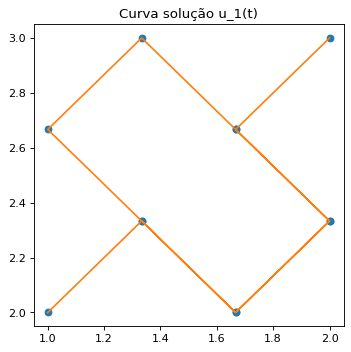

In [59]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

No que segue vamos retirar as marcas dos pontos nos gráficos:

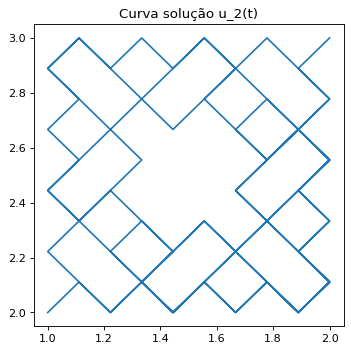

In [60]:
w=Sierpinski([1,2],[2,3],2)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_2(t)")
plt.show()

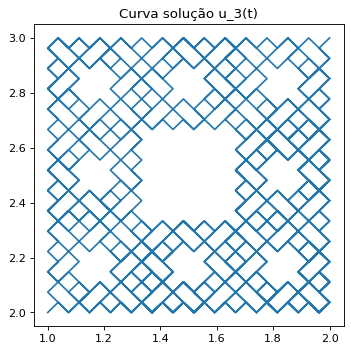

In [61]:
w=Sierpinski([1,2],[2,3],3)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_3(t)")
plt.show()

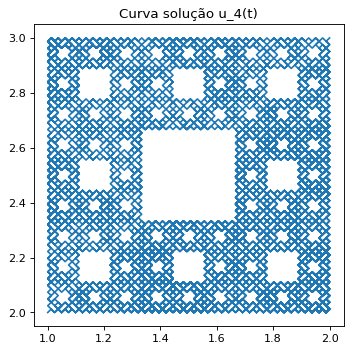

In [62]:
w=Sierpinski([1,2],[2,3],4)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_4(t)")
plt.show()

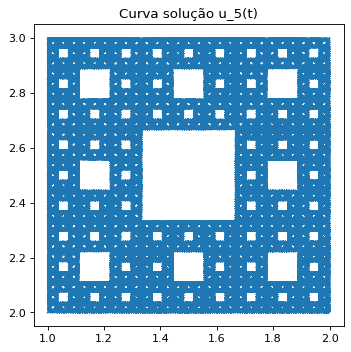

In [63]:
w=Sierpinski([1,2],[2,3],5)
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_5(t)")
plt.show()

Cabe observar que essa última figura pode ser vista como a imagem $S(A)$ da matriz $A=\begin{bmatrix}u_0&u_1\end{bmatrix}$, em que $S:V\to W$, sendo $W$ um espaço vetorial de dimensão bem grande. Veja a subseção que segue. <font color=blue> Sabe qual é a dimenção de $W$?

**Um olhar usando como transformação linear**

O segmento ligando os pontos do plano, digamos $u_0=(1,2)$ e $u_1=(2,3)$, por exemplo, pode ser representado como uma matriz, com colunas $u_0$ e $u_1$, dada por 
$$A=\begin{bmatrix}u_0&u_1\end{bmatrix}=\begin{bmatrix}1&2\\2&3\end{bmatrix},$$ por exemplo, que contém as primeiras coordenads dos pontos na primeira linha e as segundas coordenadas nas segundas linhas. 

Esperamos que fique claro que essa matriz representa o segmento de reta que liga esses pontos, e representa também a função (curva poligonal) $u_0(t)$. 

Consideramos o vetor $v=u_1-u_0$ como uma combinação linear dos vetores $u_0$ e $u_1$, e assim, uma combinação linear, das colunas da matriz $A$.

Depois disso, determinamos dois outros pontos no segmento, por meio dos pontos $u_2=u_0+v/3$ e $u_3=u_0+2v/3$, que também são combinações lineares, das colunas da matriz $A$.

<font color=blue> Então a curva poligonal ligando os pontos $u_0$ e $u_1$, passando pelos outros dois pontos $u_2$ e $u_3$, na ordem $u_0,\,u_2,\,u_3,\, u_1$, pode ser reprezentada agora como uma matriz $2\times 4$, que depende da matriz $A$, de forma linear.

Como o conjunto $V$ das matrizes $2\times 2$ e o conjunto $W_1$ das matrizes $2\times 4$ são espaços vetoriais (podem ser identificados com $\mathbb{R}^4$ e $\mathbb{R}^8$, por exemplo). 

Podemos então definir uma trasformação linear $T_1:V\to W_1$ que associa a matriz $A$ com a nova matriz $$T_1(A)=\begin{bmatrix}u_0&u_2&u_3& u_1\end{bmatrix},$$ em  que $u_i$ é escrito como coluna.

Note que $$T_1(A)=\begin{bmatrix}u_0&\frac{1}{3}(2u_0+u_1)&\frac{1}{3}(u_0+2u_1)& u_1\end{bmatrix}=\begin{bmatrix}A\begin{bmatrix}1\\0\end{bmatrix}&\frac{1}{3}A\begin{bmatrix}2\\1\end{bmatrix}&\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}& A\begin{bmatrix}0\\1\end{bmatrix}\end{bmatrix}=\frac{1}{3}\begin{bmatrix}3A\begin{bmatrix}1\\0\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&A\begin{bmatrix}1\\2\end{bmatrix}& 3A\begin{bmatrix}0\\1\end{bmatrix}\end{bmatrix}.$$

Isso nos diz que $$T_1(A)=\frac{1}{3}A\begin{bmatrix}3&2&1&0\\0&1&2&3\end{bmatrix}.$$

In [69]:
u0=np.array([1,2])
u1=np.array([2,3])

A=np.transpose(np.array([u0,u1]))
print(A)
B=np.array([[3,2,1,0],[0,1,2,3]])
pontos=A@B/3
pontos

[[1 2]
 [2 3]]


array([[1.        , 1.33333333, 1.66666667, 2.        ],
       [2.        , 2.33333333, 2.66666667, 3.        ]])

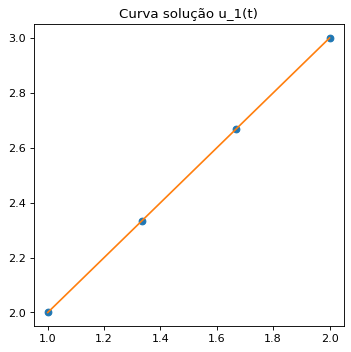

In [70]:
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

Depois disso inserimos mais pontos para construir curva uma poligonal, para retirar a parte do meio do segmento (ou o segmento menor do meio) e substituí-lo por segmentos que formam um retângulo.

Os novos pontos obtidos foram, $$u_4=u_2+\frac{1}{3}Mv,\quad u_5=u_4+\frac{1}{3}v,\quad u_6=u_3-\frac{1}{3}Mv,\quad u_7=u_6-\frac{1}{3}v.$$
em que 
$$M=\begin{bmatrix}cos(\theta)&sen(\theta)\\-sen(\theta)&\cos(\theta)\end{bmatrix}=\begin{bmatrix}0&1\\-1&0\end{bmatrix},$$ porque $\theta =\pi/2$.

A curva poligonal que liga os pontos na ordem $u_0,\,u_2,\,u_4,\, u_5,\,u_3,\, u_6,\, u_7,\,u_2,\,u_4,\, u_5,\,u_3,\,u_1$ pode enfim ser identificada com a matriz $$T(A)=T_2\circ T_1(A)=\begin{bmatrix}u_0&u_2&u_4& u_5&u_3& u_6& u_7&u_2&u_4& u_5&u_3&u_1\end{bmatrix},$$ em que $T_2:W_1\to W_2$ e $T:V\to W_2$ são transformações lineares, sendo $W_2$ o (conjunto) espaço vetorial das matrizes $2\times 12$.

Como $$\begin{cases}u_4=\frac{1}{3}(2u_0+u_1)+\frac{1}{3}M(u_1-u_0)\\\\u_5=u_4+\frac{1}{3}(u_1-u_0)\\\\ u_6=\frac{1}{3}(u_0+2u_1)-\frac{1}{3}M(u_1-u_0)\\\\ u_7=u_6-\frac{1}{3}(u_1-u_0)\end{cases}$$ 
ou 
$$\begin{cases}u_4=\frac{1}{3}A\begin{bmatrix}2\\1\end{bmatrix}+\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\\\\u_5=\frac{1}{3}A\begin{bmatrix}2\\1\end{bmatrix}+\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}+\frac{1}{3}A\begin{bmatrix}-1\\1\end{bmatrix}\\\\ u_6=\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}-\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\\\\ u_7=\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}-\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}-\frac{1}{3}A\begin{bmatrix}-1\\1\end{bmatrix}\end{cases}$$
ou
$$\begin{cases}u_4=\frac{1}{3}A\begin{bmatrix}2\\1\end{bmatrix}+\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\\\\u_5=\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}+\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\\\\ u_6=\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}-\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\\\\ u_7=\frac{1}{3}A\begin{bmatrix}2\\1\end{bmatrix}-\frac{1}{3}MA\begin{bmatrix}-1\\1\end{bmatrix}\end{cases}.$$ 


Podemos concluir que
$$\begin{cases}T(A)&=&\begin{bmatrix}u_0&u_2&u_4& u_5&u_3& u_6& u_7&u_2&u_4& u_5&u_3&u_1\end{bmatrix}\\\\&=&\frac{1}{3}\begin{bmatrix}3A\begin{bmatrix}1\\0\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&A\begin{bmatrix}1\\2\end{bmatrix}&A\begin{bmatrix}1\\2\end{bmatrix}&A\begin{bmatrix}1\\2\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&A\begin{bmatrix}2\\1\end{bmatrix}&\frac{1}{3}A\begin{bmatrix}1\\2\end{bmatrix}&A\begin{bmatrix}1\\2\end{bmatrix}& 3A\begin{bmatrix}0\\1\end{bmatrix}\end{bmatrix}\\\\
&+&\frac{1}{3}\begin{bmatrix}\begin{bmatrix}0\\0\end{bmatrix}&\begin{bmatrix}0\\0\end{bmatrix}&MA\begin{bmatrix}-1\\1\end{bmatrix}&MA\begin{bmatrix}-1\\1\end{bmatrix}&\begin{bmatrix}0\\0\end{bmatrix}&-MA\begin{bmatrix}-1\\1\end{bmatrix}&-MA\begin{bmatrix}-1\\1\end{bmatrix}&\begin{bmatrix}0\\0\end{bmatrix}&MA\begin{bmatrix}-1\\1\end{bmatrix}&MA\begin{bmatrix}-1\\1\end{bmatrix}&\begin{bmatrix}0\\0\end{bmatrix}& \begin{bmatrix}0\\0\end{bmatrix}\end{bmatrix}\end{cases}.$$ 


Ou 
$$\begin{cases}T(A)&=&\frac{1}{3}A\begin{bmatrix}3&2&2&1&1&1&2&2&2&1&1&0\\0&1&1&2&2&2&1&1&1&2&2&3\end{bmatrix}\\\\
&+&\frac{1}{3}MA\begin{bmatrix}0&0&-1&-1&0&1&1&0&-1&-1&0&0\\0&0&1&1&0&-1&-1&0&1&1&0&0\end{bmatrix}\end{cases}.$$ 


In [71]:
M=np.array([[0,1],[-1,0]])
B=[[3,2,2,1,1,1,2,2,2,1,1,0],[0,1,1,2,2,2,1,1,1,2,2,3]]
C=[[0,0,-1,-1,0,1,1,0,-1,-1,0,0],[0,0,1,1,0,-1,-1,0,1,1,0,0]]
C=np.array(C)
B=np.array(B)
print(A)
print(B)
print(C)

pontos=(A@B+M@A@C)/3
pontos

[[1 2]
 [2 3]]
[[3 2 2 1 1 1 2 2 2 1 1 0]
 [0 1 1 2 2 2 1 1 1 2 2 3]]
[[ 0  0 -1 -1  0  1  1  0 -1 -1  0  0]
 [ 0  0  1  1  0 -1 -1  0  1  1  0  0]]


array([[1.        , 1.33333333, 1.66666667, 2.        , 1.66666667,
        1.33333333, 1.        , 1.33333333, 1.66666667, 2.        ,
        1.66666667, 2.        ],
       [2.        , 2.33333333, 2.        , 2.33333333, 2.66666667,
        3.        , 2.66666667, 2.33333333, 2.        , 2.33333333,
        2.66666667, 3.        ]])

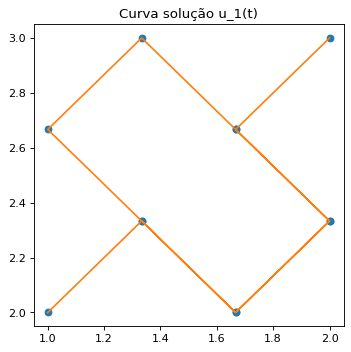

In [72]:
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

#**Animação do processo de construção da imagem fractal (tapete)**

Para visualizar animação clique no link Open in Colab no início da página.

In [94]:
w=Sierpinski([1,2],[2,3],2)
w=np.transpose(w)
x3=w[0]
y3=w[1]

from matplotlib.animation import FuncAnimation
from IPython import display

Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
line_plotted = lines_plotted[0]
 
plt.xlim(1,2) 
 
plt.ylim(2,3)  

# function takes frame as an input
def AnimationFunction(i):
  plt.plot(x3[:i],y3[:i])
  
anim_created = FuncAnimation(Figure, AnimationFunction, frames=len(w[0])+1, interval=50)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()

#**Generalizações**

Você pode adaptar o código aqui apresentado, e os argumentos, para construir outras curvas poligonais, como a curva [floco de neve de Koch](https://pt.wikipedia.org/wiki/Curva_de_Koch).
Veja um exemplo em linguagem R nesse [link](https://www.mycompiler.io/view/GnvWvrL).

Vamos apresentar rápidamente uma possível construção de uma imagem conhecida como [triângulo de Sierpinski](https://pt.wikipedia.org/wiki/Tri%C3%A2ngulo_de_Sierpinski).

Primeiro escolhemos um segmento definido, por exemplo, pelos pontos $u_0=(0,1)$ e $u_1=(1,2)$:

z=[[0 1]
 [1 2]]


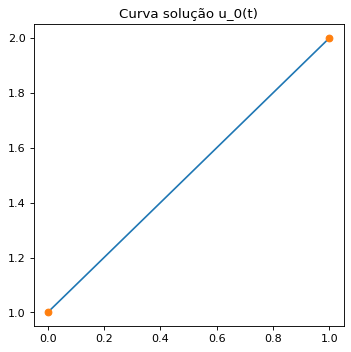

In [24]:
import numpy as np
from matplotlib import pyplot as plt

x=np.array([0,1])
y=np.array([1,2])
z=np.transpose(np.array([x,y]))
print(f'z={z}')

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z[0],z[1],'-')
plt.plot(z[0],z[1], 'o')
plt.title("Curva solução u_0(t)")
plt.show()

Como fizemos no exemplo anterior, definimos a forma de ir alterando cada parte do segmento para obter uma curva poligonal:

In [25]:
def iterat(x,y,sinal):
  x=np.array(x)
  y=np.array(y)
  u=y-x
  t=sinal*(np.pi/3)
  M=np.array([[np.cos(t),np.sin(t)],[-np.sin(t),np.cos(t)]]) # Matriz de rotação.
  p=np.zeros((4,2))
  p[0]=x
  p[1]=p[0]+M@u/2
  p[2]=p[1]+u/2
  p[3]=y
  return p

Vejamos como fica a alteração, em cada parte da curva:

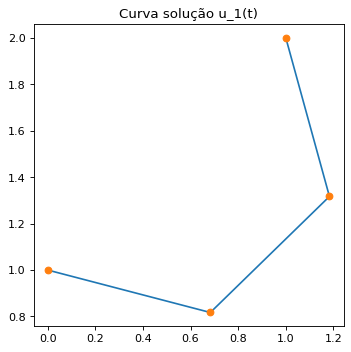

In [26]:
sinal=1
z1=np.transpose(iterat(x,y,sinal))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z1[0],z1[1],'-')
plt.plot(z1[0],z1[1], 'o')
plt.title("Curva solução u_1(t)")
plt.show()

Alterando o sinal na matriz de rotação  <font color=blue> (que aqui é de ânglulo $\theta=\pi/3$) <font color=black> obtemos:

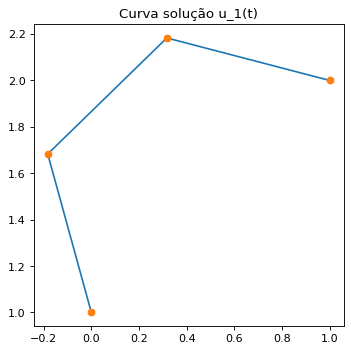

In [27]:
sinal=-1
z2=np.transpose(iterat(x,y,sinal))

ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(z2[0],z2[1],'-')
plt.plot(z2[0],z2[1], 'o')
plt.title("Curva solução u_1(t)")
plt.show()

Vamos agora definir a função que irá repetir o processo em cada novo segmento obtido. <font color=blue> Agora vamos alterar a rotação de $\pi/3$ para $-\pi/3$ em alguns segmentos:

In [28]:
def Sierpinskit(a,b,m): # Replicação m vezes da iteração base, a e b são vetores com duas coordenadas.
   sinal=1
   z=[]
   z.append(a)
   z.append(b)
   for i in range(0,m):
     q=[]
     q.append(a)
     for j in range(0,len(z)-1):
       qa=iterat(z[j],z[j+1],sinal)
       sinal=-sinal
       for l in range(1,len(qa)):
         q.append(qa[l])
     z=q
   return z

Vamos testar a nossa função:

In [29]:
w=Sierpinskit(x,y,1)
w

[array([0, 1]),
 array([0.6830127, 0.8169873]),
 array([1.1830127, 1.3169873]),
 array([1., 2.])]

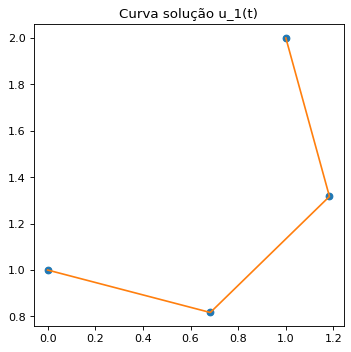

In [30]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_1(t)")
plt.show()

In [31]:
w=Sierpinskit(x,y,2)

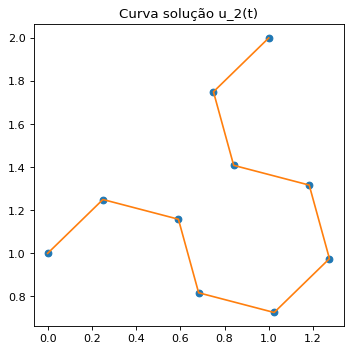

In [32]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_2(t)")
plt.show()

In [33]:
w=Sierpinskit(x,y,3)

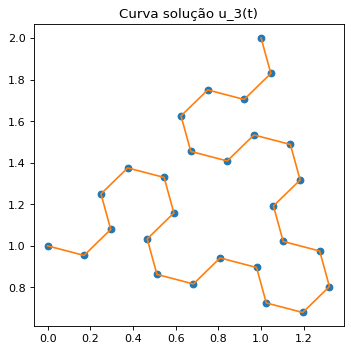

In [34]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_3(t)")
plt.show()

In [35]:
w=Sierpinskit(x,y,4)

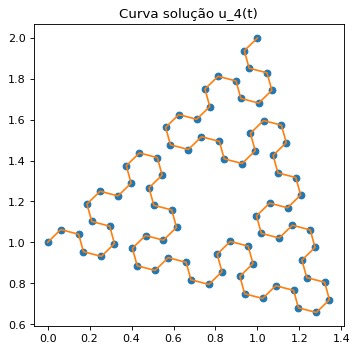

In [36]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_4(t)")
plt.show()

In [37]:
w=Sierpinskit(x,y,5)

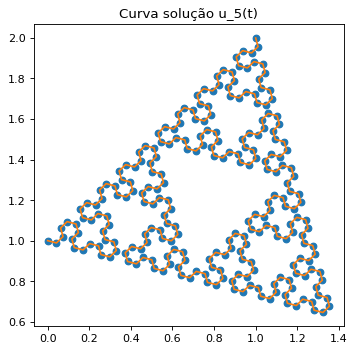

In [38]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_5(t)")
plt.show()

No que segue vamos retirar os pontos dos gráficos:

In [39]:
w=Sierpinskit(x,y,7)

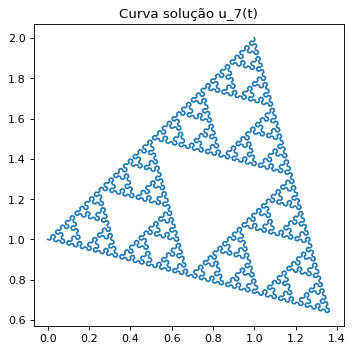

In [40]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_7(t)")
plt.show()

In [41]:
w=Sierpinskit(x,y,9)

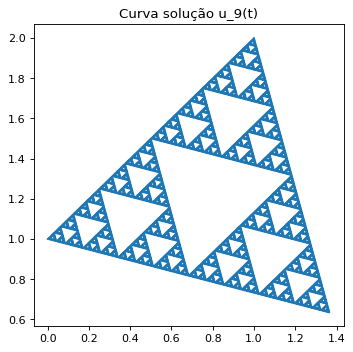

In [42]:
pontos=np.transpose(w)
ax = plt.subplots(figsize=(5,5), dpi=80)
#plt.plot(pontos[0], pontos[1], 'o')
plt.plot(pontos[0], pontos[1], '-')
plt.title("Curva solução u_9(t)")
plt.show()

#**Referências**


1. FERREIRA, J. C.; JULIO, R. S. [O problema do cachorro e do coelho: uma perseguição a partir de produções de significados.](https://periodicos.ufjf.br/index.php/ridema/article/view/38516) Revista de Investigação e Divulgação em Educação Matemática , [S. l.], v. 6, n. 1, 2022.

2. STEWART, J. Cálculo: volume 2. São Paulo: Cengage Learning, 2013.

3. FERREIRA, J. C. [Quando os Métodos de Euler e de Newton coincidem.](https://rmu.sbm.org.br/wp-content/uploads/sites/27/2021/03/3-Quandos-os-m%C3%A9todos-de-Eules-e-Newton-coinciden.pdf) Revista Matemática Universitária, v.1, 2021.